In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
prices_3 = pd.read_csv('data/prices_round_4_day_3.csv', sep=';')
prices_2 = pd.read_csv('data/prices_round_4_day_2.csv', sep=';')
prices_1 = pd.read_csv('data/prices_round_4_day_1.csv', sep=';')

trades_3 = pd.read_csv('data/trades_round_4_day_3_nn.csv', sep=';')
trades_2 = pd.read_csv('data/trades_round_4_day_2_nn.csv', sep=';')
trades_1 = pd.read_csv('data/trades_round_4_day_1_nn.csv', sep=';')

COCONUT = 'COCONUT'
COCONUT_COUPON = 'COCONUT_COUPON'

In [13]:
df = pd.concat([prices_1, prices_2, prices_3]).reset_index(drop=True)

In [14]:
coconut_prices = df[df["product"] == COCONUT].reset_index(drop=True)
coupon_prices = df[df["product"] == COCONUT_COUPON].reset_index(drop=True)
coconut_prices["spread"] = coconut_prices["ask_price_1"] - coconut_prices["bid_price_1"]
coupon_prices["spread"] = coupon_prices["ask_price_1"] - coupon_prices["bid_price_1"]

In [15]:
# print("coconut mid_price:\n", coconut_prices["mid_price"].describe())
# print("coconut spread:\n", coconut_prices["spread"].describe())
# print("coupon mid_price:\n", coupon_prices["mid_price"].describe())
# print("coupon spread:\n", coupon_prices["spread"].describe())

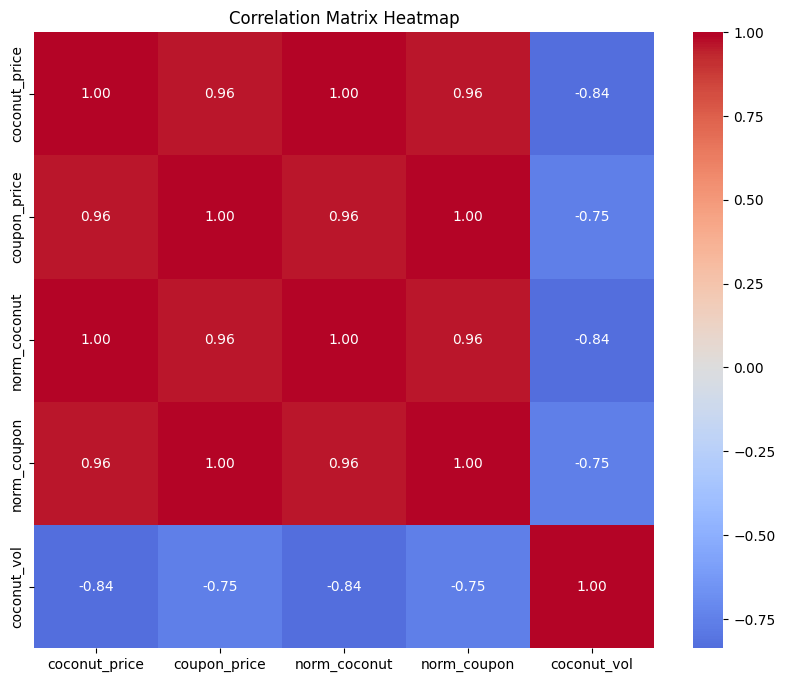

               coconut_price  coupon_price  norm_coconut  norm_coupon  \
coconut_price       1.000000      0.957869      1.000000     0.957869   
coupon_price        0.957869      1.000000      0.957869     1.000000   
norm_coconut        1.000000      0.957869      1.000000     0.957869   
norm_coupon         0.957869      1.000000      0.957869     1.000000   
coconut_vol        -0.837175     -0.754884     -0.837175    -0.754884   

               coconut_vol  
coconut_price    -0.837175  
coupon_price     -0.754884  
norm_coconut     -0.837175  
norm_coupon      -0.754884  
coconut_vol       1.000000  


In [16]:
import seaborn as sns
normalized_coconut = coconut_prices["mid_price"] - 10000
vol = normalized_coconut.rolling(window=12000).std()
data = pd.DataFrame({"coconut_price": coconut_prices["mid_price"], "coupon_price": coupon_prices["mid_price"]})
data["norm_coconut"] = normalized_coconut
data["norm_coupon"] = coupon_prices["mid_price"] - 637.63
data["coconut_vol"] = vol
corr_mat = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()
print(corr_mat)

In [17]:
data = pd.DataFrame({"diff": coconut_prices["mid_price"] - coupon_prices["mid_price"]})
print(data["diff"].mean(), data["diff"].std())

9364.85455 46.10788147220923


mean mid price diff: 9364.85455
std mid price diff: 46.10788147220923


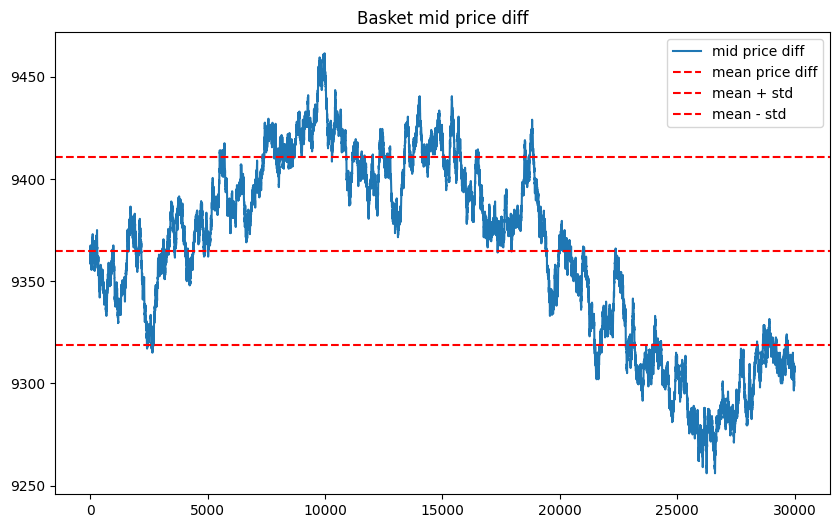

In [18]:
diff = coconut_prices["mid_price"] - coupon_prices["mid_price"]
mean_diff = diff.mean()
std_diff = diff.std()
print(f"mean mid price diff: {mean_diff}")
print(f"std mid price diff: {std_diff}")

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(diff, label="mid price diff")
plt.axhline(y=mean_diff, color='r', linestyle='--', label='mean price diff')
plt.axhline(y=mean_diff + std_diff, color='r', linestyle='--', label='mean + std')
plt.axhline(y=mean_diff - std_diff, color='r', linestyle='--', label='mean - std')
plt.title("Basket mid price diff")
plt.legend()
plt.show()